In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
import sys

In [4]:
from sm_annotation_utils.sm_annotation_utils import SMInstance
sm = SMInstance("config.json")

In [5]:
#iso_image_utils = reload(iso_image_utils)

In [6]:
db_name = 'HMDB'
ds_name = 'AstraZeneca//Xenograft'
limit = 5

In [7]:
d = sm.dataset(ds_name)
results = sm.msm_scores([d], d.annotations()[:limit]).T
results

,ds_name,AstraZeneca//Xenograft
sf,adduct,
C22H32O2,-H,0.986470
C34H69NO3,+Cl,0.986374
C37H70O5,+Cl,0.976975
C44H79O10P,+C3H5O3,0.984000
C47H85O13P,-H,0.984000


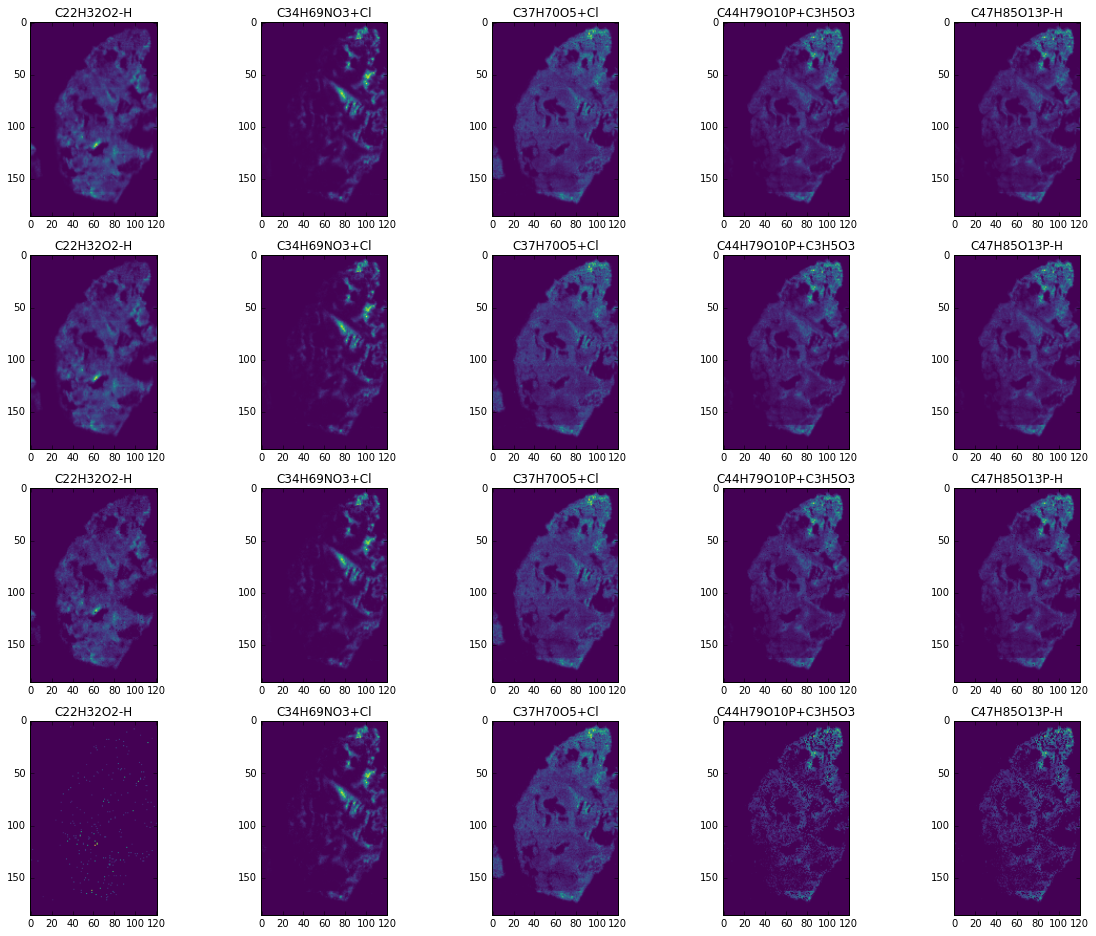

In [8]:
plt.figure(figsize=(20, 16))
for i, row in enumerate(results.reset_index().itertuples()):
    images = d.isotope_images(row.sf, row.adduct)
    for j, im in enumerate(images):
        plt.subplot(4, limit, j * limit + i + 1)
        plt.title(row.sf + row.adduct)
        plt.imshow(images[j], cmap='viridis')